In [1]:
import os
import sys
import inspect
import numpy as np
import pandas as pd
import sqlite3

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from matplotlib import pyplot as plt

from analysis.deck_clustering import DeckClustering

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

DB_PATH = '../mtgmelee.db'

In [2]:
# helper to print out cluster decklists
def display_clusters(df):
    classifications = np.unique(df['classification'])
    for classification in classifications:
        dfc = df[df['classification'] == classification]
        dfc = dfc.loc[:, (dfc != 0).any(axis=0)]
        display(dfc)

In [3]:
d = DeckClustering(db_path=DB_PATH, tournament_id=2480)

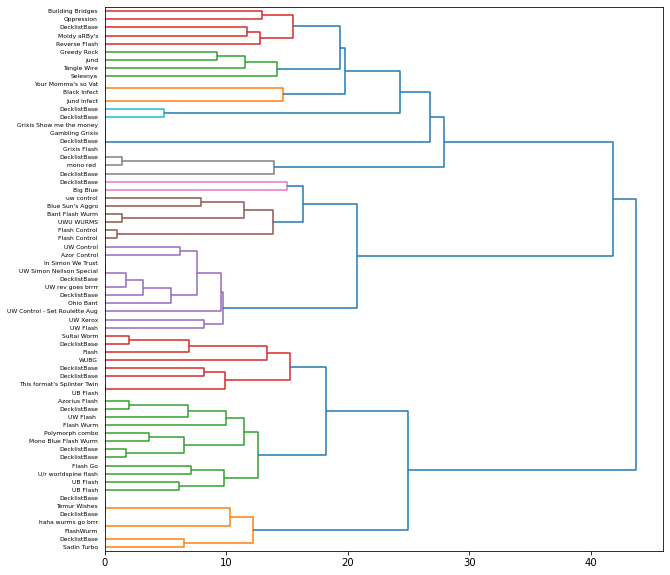

In [4]:
cluster_df, model = d.get_clusters_heirarchical(distance_threshold=16)
plt.figure(figsize=(10, 10))
d.plot_dendrogram(df=cluster_df, model=model, color_threshold=16)

In [5]:
d.get_winrate_matrix(cluster_df, min_cluster_size=4)

classification_player2,0,10,11,2,4,5,7,9,Other,Non-Mirror %,Non-Mirror Matches,Top Cards
classification_player1,,,,,,,,,,,,
0,"50%, 2","33%, 3","25%, 4","67%, 3","0%, 1","100%, 3","60%, 5","25%, 4","0%, 1",46%,24,"Cabal Therapy, Duress, Underworld Connections"
10,"67%, 3","50%, 18","67%, 12","80%, 5","100%, 2","62%, 8","83%, 6","50%, 4","54%, 13",66%,53,"Worldspine Wurm, Counterspell, Accumulated Kno..."
11,"75%, 4","33%, 12","50%, 2","50%, 4","100%, 1","100%, 3","33%, 3","0%, 2","67%, 6",51%,35,"Mystical Tutor, Sleight of Hand, Cunning Wish"
2,"33%, 3","20%, 5","50%, 4","50%, 6","33%, 3","50%, 2","43%, 7","50%, 2","50%, 6",41%,32,"Flash, Worldspine Wurm, Sleight of Hand"
4,"100%, 1","0%, 2","0%, 1","67%, 3","50%, 2","0%, 3","0%, 1","67%, 3","50%, 2",38%,16,"Birds of Paradise, Llanowar Elves, Cabal Therapy"
5,"0%, 3","38%, 8","0%, 3","50%, 2","100%, 3","50%, 2","100%, 1","50%, 2","80%, 5",48%,27,"Counterspell, Detention Sphere, Supreme Verdict"
7,"40%, 5","17%, 6","67%, 3","57%, 7","100%, 1","0%, 1","50%, 12","0%, 4","33%, 6",36%,33,"Counterspell, Azorius Charm, Accumulated Knowl..."
9,"75%, 4","50%, 4","100%, 2","50%, 2","33%, 3","50%, 2","100%, 4","50%, 2","50%, 2",65%,23,"Worldspine Wurm, Sleight of Hand, Consecrated ..."
Other,"100%, 1","46%, 13","33%, 6","50%, 6","50%, 2","20%, 5","67%, 6","50%, 2","50%, 6",46%,41,"Cabal Therapy, Plague Myr, Ash Zealot"


In [6]:
display_clusters(d.combine_small_clusters(cluster_df, min_cluster_size=4))

,title,Abrupt Decay,Accumulated Knowledge,Black Sun's Zenith,Blue Sun's Zenith,Burning Wish,Cabal Therapy,Corrupt,Counterspell,Crypt Rats,Dark Ritual,Deathrite Shaman,Desecration Demon,Dispel,Dreadbore,Dreg Mangler,Duress,Ensnaring Bridge,Flayer Husk,Genesis,Go for the Throat,Grafted Skullcap,"Jace, Architect of Thought",Judge's Familiar,Mind Swords,Mizzium Mortars,Mortarpod,Oppression,Pack Rat,Painful Memories,Phyrexian Rager,Phyrexian Revoker,Pithing Needle,Shrieking Affliction,Signal Pest,Stupor,"Tezzeret, Agent of Bolas",Ultimate Price,Underworld Connections,Vraska the Unseen,id,classification
11,Oppression,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,3.0,0.0,48442,0
44,Reverse Flash,0.0,4.0,1.0,1.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,48498,0
54,Moldy aRBy's,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,48509,0
55,Building Bridges,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,4.0,0.0,4.0,0.0,3.0,0.0,48510,0
57,DecklistBase,3.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,48512,0


,title,Accumulated Knowledge,Angel of Serenity,Azorius Charm,Cabal Therapy,Consecrated Sphinx,Counterspell,Cunning Wish,Cyclonic Rift,Daze,Detention Sphere,Dispel,Duress,Enlightened Tutor,Flash,Flash of Insight,Force Spike,Hibernation,Izzet Charm,"Jace, Architect of Thought",Memory Lapse,Mental Note,Mizzium Mortars,Mystical Tutor,Pack Rat,Polymorph,Pyroclasm,Sleight of Hand,Sphinx's Revelation,Supreme Verdict,Worldly Tutor,Worldspine Wurm,id,classification
1,Flash Wurm,0.0,0.0,3.0,0.0,0.0,4.0,4.0,0.0,3.0,4.0,3.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,47081,10
4,UB Flash,4.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,3.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,48418,10
20,DecklistBase,4.0,0.0,0.0,0.0,1.0,4.0,3.0,0.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,4.0,48454,10
27,U/r worldspine flash,4.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,1.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,48469,10
28,Flash Go,4.0,1.0,0.0,0.0,0.0,4.0,4.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,4.0,0.0,0.0,2.0,4.0,48470,10
35,DecklistBase,4.0,0.0,0.0,0.0,1.0,4.0,3.0,0.0,4.0,0.0,2.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,4.0,48478,10
40,DecklistBase,4.0,2.0,1.0,0.0,0.0,4.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,4.0,48494,10
42,Azorius Flash,4.0,2.0,0.0,0.0,0.0,4.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,4.0,48496,10
45,Mono Blue Flash Wurm,4.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0,3.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,48500,10
46,Polymorph combo,4.0,0.0,0.0,0.0,1.0,4.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,4.0,48501,10


,title,Birds of Paradise,Counterspell,Cunning Wish,Cyclonic Rift,Daze,Dispel,Duress,Flash,Flash of Insight,Force Spike,Goblin Electromancer,Incinerate,Living Wish,Memory Lapse,Mystical Tutor,Pack Rat,Shallow Grave,Sleight of Hand,Worldly Tutor,Worldspine Wurm,id,classification
5,FlashWurm,0.0,0.0,4.0,0.0,4.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,4.0,1.0,3.0,48432,11
6,haha wurms go brrr,0.0,0.0,4.0,0.0,4.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,4.0,1.0,3.0,48433,11
21,Sadin Turbo,4.0,4.0,3.0,0.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,1.0,1.0,4.0,2.0,3.0,48455,11
51,Temur Wishes,0.0,0.0,4.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,4.0,3.0,4.0,4.0,4.0,0.0,0.0,4.0,0.0,3.0,48506,11
58,DecklistBase,0.0,0.0,4.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,4.0,3.0,4.0,4.0,4.0,0.0,0.0,4.0,0.0,3.0,48513,11
62,DecklistBase,0.0,0.0,4.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,4.0,3.0,4.0,4.0,4.0,0.0,0.0,4.0,0.0,3.0,48517,11
63,DecklistBase,4.0,0.0,4.0,2.0,3.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,4.0,2.0,4.0,0.0,0.0,4.0,4.0,3.0,48519,11


,title,Accumulated Knowledge,Angel of Serenity,Cabal Therapy,Counterspell,Cunning Wish,Cyclonic Rift,Dark Ritual,Daze,Deathrite Shaman,Desecration Demon,Dispel,Duress,Flash,Hapless Researcher,Judge's Familiar,Lure of Prey,Mystical Tutor,Persecute,Reclaim,Sapphire Charm,Shallow Grave,Sleight of Hand,Underworld Connections,Worldly Tutor,Worldspine Wurm,id,classification
14,UB Flash,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,48446,2
17,Flash,0.0,0.0,0.0,4.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,4.0,0.0,4.0,1.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,48449,2
23,DecklistBase,4.0,0.0,4.0,4.0,0.0,1.0,4.0,3.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,48459,2
26,DecklistBase,0.0,0.0,0.0,4.0,0.0,1.0,0.0,3.0,0.0,0.0,4.0,4.0,4.0,0.0,4.0,0.0,4.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,4.0,48468,2
33,DecklistBase,4.0,0.0,4.0,3.0,0.0,2.0,0.0,2.0,0.0,4.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,48476,2
47,This format's Splinter Twin,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,48502,2
48,Sultai Worm,0.0,0.0,0.0,4.0,1.0,1.0,0.0,4.0,0.0,0.0,4.0,4.0,4.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,4.0,48503,2
66,WUBG,0.0,2.0,4.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0,2.0,0.0,0.0,2.0,4.0,4.0,0.0,0.0,4.0,48529,2


,title,Abrupt Decay,Birds of Paradise,Blastoderm,Cabal Therapy,Call of the Conclave,Deathrite Shaman,Desecration Demon,Dreadbore,Dreg Mangler,Dryad Militant,Duress,Green Sun's Zenith,Llanowar Elves,Loxodon Smiter,Mirran Crusader,Pack Rat,Phantom Centaur,Phantom Nishoba,Rakdos's Return,Seedtime,Slaughter Games,Sword of Feast and Famine,Tangle Wire,"Thrun, the Last Troll",Viridian Emissary,Vraska the Unseen,Worship,id,classification
15,jund,3.0,4.0,0.0,4.0,0.0,0.0,2.0,1.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,0.0,48447,4
43,Greedy Rock,2.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0,48497,4
49,Selesnya,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,0.0,2.0,1.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,2.0,48504,4
65,Tangle Wire,2.0,4.0,0.0,4.0,3.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,4.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,0.0,0.0,0.0,48522,4


,title,Accumulated Knowledge,Blue Sun's Zenith,Consecrated Sphinx,Counterspell,Cunning Wish,Cyclonic Rift,Detention Sphere,Dispel,Enlightened Tutor,Flash,"Jace, Architect of Thought",Living Wish,Mirari's Wake,Mystical Tutor,Power Sink,Rest in Peace,Sacred Mesa,Sleight of Hand,Sphinx's Revelation,Supreme Verdict,"Thrun, the Last Troll",Web of Inertia,White Sun's Zenith,Worldly Tutor,Worldspine Wurm,Wrath of God,id,classification
7,UWU WURMS,0.0,0.0,3.0,4.0,0.0,1.0,4.0,3.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,1.0,0.0,4.0,0.0,48436,5
18,Flash Control,4.0,0.0,0.0,4.0,0.0,0.0,3.0,2.0,0.0,4.0,0.0,4.0,0.0,2.0,2.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,48451,5
19,Flash Control,4.0,0.0,0.0,4.0,0.0,0.0,3.0,2.0,0.0,4.0,0.0,4.0,0.0,3.0,2.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,48452,5
36,Bant Flash Wurm,0.0,0.0,3.0,4.0,0.0,0.0,4.0,3.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,1.0,0.0,4.0,0.0,48479,5
50,Blue Sun's Aggro,4.0,1.0,3.0,4.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,3.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,48505,5
52,uw control,0.0,1.0,0.0,4.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0,3.0,1.0,4.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,48507,5


,title,Accumulated Knowledge,Azorius Charm,Blue Sun's Zenith,Codex Shredder,Consecrated Sphinx,Counterspell,Cyclonic Rift,Daze,Detention Sphere,Dispel,Dissipate,Flash,"Jace, Architect of Thought",Judge's Familiar,Memory Lapse,Mystical Tutor,Power Sink,Psychic Spiral,Remove Soul,Sphinx's Revelation,Supreme Verdict,Syncopate,"Thrun, the Last Troll",White Sun's Zenith,Worldspine Wurm,Wrath of God,id,classification
0,UW Flash,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,3.0,1.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,3.0,0.0,46210,7
8,UW Simon Neilson Special,4.0,4.0,0.0,0.0,2.0,4.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,1.0,48438,7
24,Ohio Bant,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,0.0,48464,7
25,Azor Control,4.0,4.0,1.0,1.0,0.0,4.0,0.0,0.0,3.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,0.0,0.0,0.0,2.0,48466,7
30,UW Control - Set Roulette Aug,0.0,4.0,1.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0,2.0,48472,7
31,In Simon We Trust,4.0,4.0,0.0,0.0,2.0,4.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,1.0,48473,7
32,DecklistBase,4.0,4.0,0.0,0.0,2.0,4.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,1.0,48475,7
34,DecklistBase,4.0,4.0,0.0,0.0,1.0,4.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,1.0,48477,7
37,UW Xerox,4.0,2.0,0.0,0.0,0.0,4.0,1.0,0.0,3.0,0.0,0.0,2.0,4.0,0.0,0.0,3.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,1.0,2.0,2.0,48481,7
39,UW Control,4.0,4.0,1.0,0.0,2.0,4.0,0.0,2.0,4.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0,48493,7


,title,Burning Wish,Cabal Therapy,Consecrated Sphinx,Dark Ritual,Dispel,Duress,Flash,Mystical Tutor,Ostracize,Persecute,Sleight of Hand,Stronghold Gambit,Worldspine Wurm,id,classification
9,Gambling Grixis,2.0,4.0,4.0,3.0,1.0,4.0,4.0,1.0,2.0,3.0,4.0,3.0,4.0,48439,9
10,Grixis Show me the money,2.0,4.0,4.0,3.0,1.0,4.0,4.0,1.0,2.0,3.0,4.0,3.0,4.0,48440,9
29,DecklistBase,2.0,4.0,4.0,3.0,1.0,4.0,4.0,1.0,2.0,3.0,4.0,3.0,4.0,48471,9
38,Grixis Flash,2.0,4.0,4.0,3.0,1.0,4.0,4.0,1.0,2.0,3.0,4.0,3.0,4.0,48487,9


,title,Accorder Paladin,Accumulated Knowledge,Ash Zealot,Benevolent Bodyguard,Birds of Paradise,Blistercoil Weird,Blue Sun's Zenith,Cabal Therapy,Cancel,Consecrated Sphinx,Counterspell,Cunning Wish,Dark Ritual,Daze,Detention Sphere,Deviant Glee,Dispel,Dissipate,Dreadbore,Dryad Militant,Duress,Enlightened Tutor,Flame Rift,Flayer Husk,Flensermite,Force Spike,Giant Growth,Glorious Anthem,Go for the Throat,Gore-House Chainwalker,Green Sun's Zenith,Guttersnipe,Hellhole Flailer,Hero of Bladehold,Incinerate,Judge's Familiar,Lava Dart,Leonin Relic-Warder,Mana Bloom,Mana Clash,Meekstone,Might of Oaks,Mirari's Wake,Monstrous Growth,Mortarpod,Nivmagus Elemental,Phyrexian Crusader,Phyrexian Vatmother,Piston Sledge,Plague Myr,Precinct Captain,Rakdos Cackler,Rakdos Shred-Freak,Rest in Peace,Sacred Mesa,Seal of Cleansing,Seal of Fire,Seal of Removal,Seal of Strength,Shock,Signal Pest,Solitary Confinement,Sword of Feast and Famine,Sylvan Safekeeper,Tangle Wire,Verduran Enchantress,Volcanic Hammer,Web of Inertia,Wild Growth,id,classification
2,Jund Infect,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47447,Other
3,DecklistBase,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,48368,Other
12,Black Infect,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,48443,Other
13,Your Momma's so Vat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,48445,Other
16,Big Blue,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,4.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48448,Other
22,DecklistBase,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,48456,Other
41,DecklistBase,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,0.0,1.0,4.0,48495,Other
56,mono red,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,48511,Other
59,DecklistBase,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48514,Other
64,DecklistBase,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0

## LDA
LDA clustering works, but it produces less satisfying clusters than heirarchical clustering. Since you have to specify the number of clusters beforehand, you end up with some weird combo-clusters. These situations are easier to work out with hierarchical clustering, since combined clusters will always have some overlap.

In [7]:
# cluster_df, _ = d.get_clusters_lda(n_components=6)
# display_clusters(d.combine_small_clusters(cluster_df, min_cluster_size=4))